# Netflix Data Analysis Project

### Project Overview
This project aims to analyze a dataset of Netflix shows and movies to uncover interesting insights and patterns. The dataset includes information such as show ID, type, title, director, cast, country, date added, release year, rating, and duration. The analyses performed in this project cover various aspects of the dataset, including distribution of content types, trends in release years, most frequent actors and directors, and more.

### Dataset
The dataset used for this project includes the following columns:
- show_id: Unique ID for each show
- type: Type of content (Movie or TV Show)
- title: Title of the content
- director: Director of the content
- cast: Cast members
- country: Country of production
- date_added: Date the content was added to Netflix
- release_year: Year the content was released
- rating: Rating of the content
- duration: Duration of the content (in minutes for movies, number of seasons for TV shows)

## Step 1: Importing libraries and loading data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv", encoding='latin1')

## Step 2: Data mining

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [42]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809,8809,8809,6175,7984,7978,8799,8809.000000,8805,8806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,8809,2,8806,4529,7694,748,1768,NaN,18,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s1,Movie,22-Jul,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6132,2,19,19,2819,109,NaN,3208,1794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.181292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.818932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [44]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.9%
cast null rate: 9.37%
country null rate: 9.43%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
Unnamed: 12 null rate: 100.0%
Unnamed: 13 null rate: 100.0%
Unnamed: 14 null rate: 100.0%
Unnamed: 15 null rate: 100.0%
Unnamed: 16 null rate: 100.0%
Unnamed: 17 null rate: 100.0%
Unnamed: 18 null rate: 100.0%
Unnamed: 19 null rate: 100.0%
Unnamed: 20 null rate: 100.0%
Unnamed: 21 null rate: 100.0%
Unnamed: 22 null rate: 100.0%
Unnamed: 23 null rate: 100.0%
Unnamed: 24 null rate: 100.0%
Unnamed: 25 null rate: 100.0%


## Step 3: Data cleansing

In [46]:
# Pozbycie się kulumn od 12 z pustymi wartościami
df = df[df.columns[:12]]

In [47]:
# Uzupełnianie brakujących wartości rating
df['rating'].unique()

allowed_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 0, 'TV-Y7-FV', 'UR', 'A']

df['rating'] = df['rating'].apply(lambda x: x if x in allowed_ratings else 'Unknown')

In [48]:
# Uzupełnianie brakujących wartości duration
df['duration'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1665/1779575315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna('Unknown', inplace=True)


In [49]:
# Uzupełnianie brakujących wartości director
df['director'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1665/1812801374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [50]:
# Uzupełnianie brakujących wartości cast
df['cast'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1665/1789216245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)


In [51]:
# Uzupełnianie brakujących wartości country
df['country'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1665/356177824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [52]:
df['date_added'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_1665/227561329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1665/227561329.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace=True)


In [53]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8809 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Step 4: Data analysis

### 1. Analysis of the distribution of content types (movies vs. series)

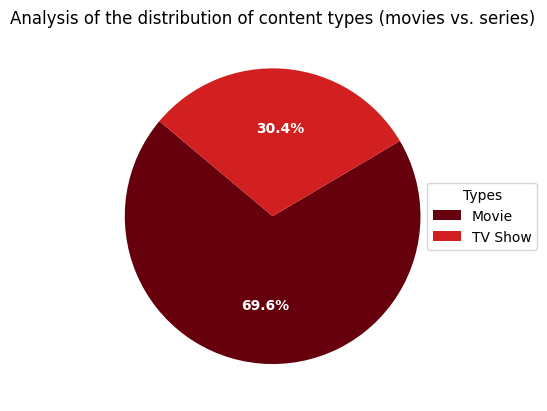

In [55]:
import matplotlib.pyplot as plt

# Obliczanie liczby wartości
type_counts = df['type'].value_counts()

# Ustawienie palety kolorów
colors = ['#67000D', '#D21F20', '#FF5733']

# Tworzenie wykresu kołowego
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(type_counts.values, labels=type_counts.index, colors=colors,
                                  autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Stylizacja wykresu
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Analysis of the distribution of content types (movies vs. series)")
ax.legend(wedges, type_counts.index,
          title="Types",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))

ax.set_facecolor('#F5F5F5')

plt.show()

The pie chart is divided into two sections, with one section representing Movies and the other representing TV Shows. Movies constitute 69.6% of the total content. TV Shows make up 30.4% of the total content. The majority of the content is Movies, making up more than two-thirds of the total. TV Shows, while a significant portion, are less prevalent than Movies, comprising just under one-third of the total content.

### 2. Number of productions depending on the country

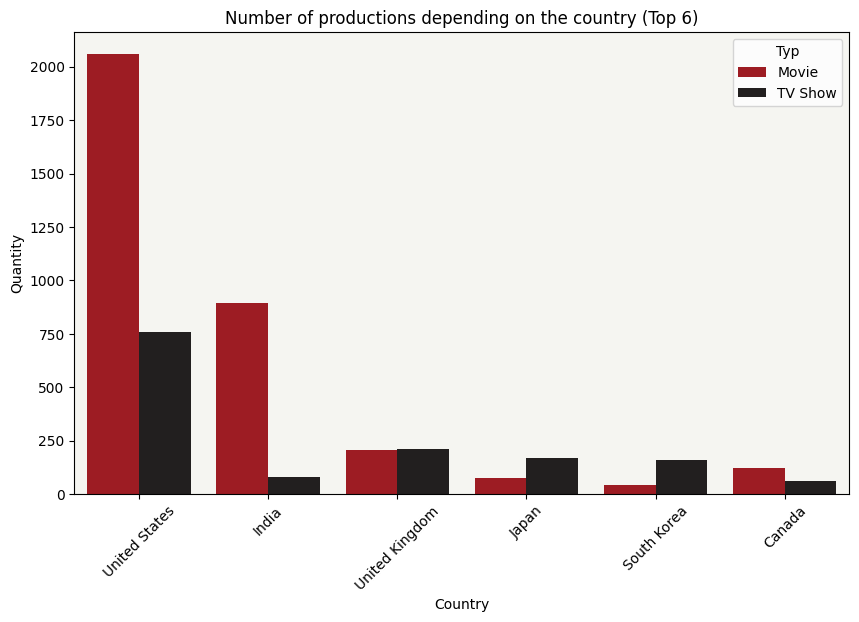

In [56]:
df = df[df['country'] != 'Unknown']

top_countries = df['country'].value_counts().nlargest(6).index

df_filtered = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f1')
palette = {'Movie': '#b20710', 'TV Show': '#221f1f'}
sns.countplot(data=df_filtered, x='country', hue='type', palette=palette)

plt.title('Number of productions depending on the country (Top 6)')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Typ')
plt.show()

The United States leads in both movie and TV show production by a large margin. The United States and India focus predominantly on movie production. The United Kingdom, Japan, and Canada have a more balanced production of movies and TV shows. South Korea is unique among these countries with a higher focus on TV shows compared to movies.

### 3. Analysis of publishing trends

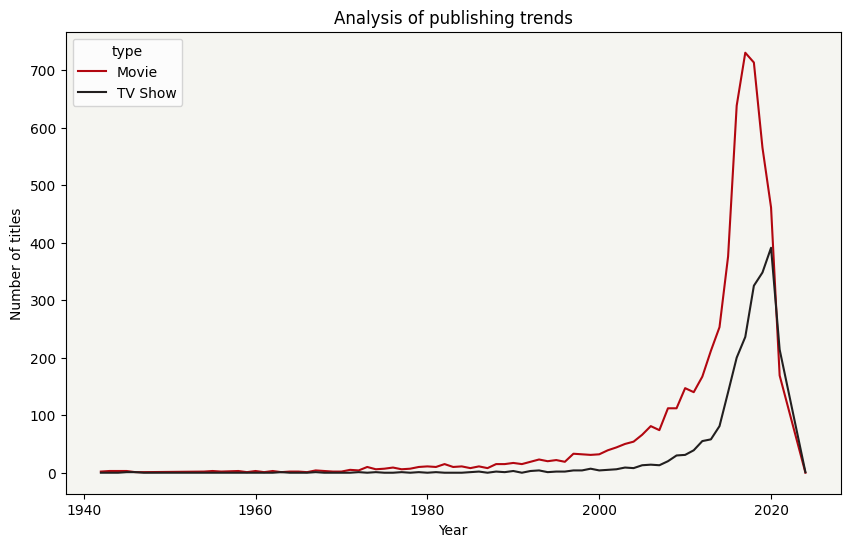

In [57]:
content_type_trend = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
colors = {'Movie': '#b20710', 'TV Show': '#221f1f'}
content_type_trend.plot(kind='line', figsize=(10, 6), color=colors)
plt.gca().set_facecolor('#f5f5f1')
plt.title('Analysis of publishing trends')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.show()

There is a significant increase in the number of both Movies and TV Shows starting around the early 2000s. Both Movies and TV Shows reach their peak around 2020, after which there is a noticeable decline.

Movies (Red Line):
The number of Movies remains relatively low and stable from 1940 until the early 2000s. Around 2000, the number of Movies begins to rise sharply, reaching a peak of over 700 titles around 2020. Post-2020, there is a sharp decline in the number of Movies.

TV Shows (Black Line):
Similar to Movies, the number of TV Shows remains low and stable from 1940 until the early 2000s. There is a noticeable increase in TV Shows starting from around 2000, but it is not as steep as the increase in Movies. The number of TV Shows peaks around 2020 but at a lower peak compared to Movies (approximately 500 titles). Post-2020, there is a decline in the number of TV Shows, but it is not as sharp as the decline observed in Movies.

Comparative Analysis:
While both Movies and TV Shows experience a significant rise in numbers from 2000 to 2020, Movies have a higher peak than TV Shows.
The trends for both types of media follow a similar pattern, with a rise in numbers starting from the 2000s and peaking around 2020, followed by a decline.


#### 4. The number of Movies published after the year 2000.

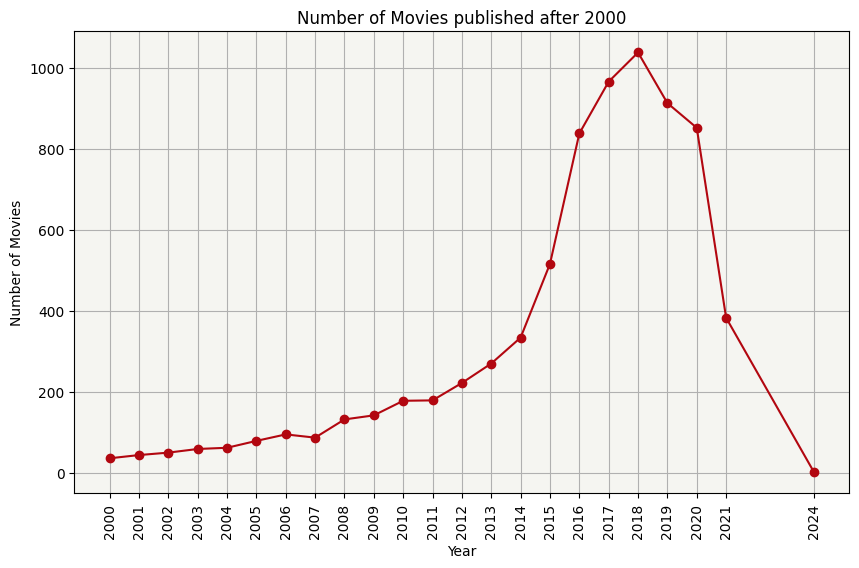

In [58]:
release_year_counts = df[df['release_year'] >= 2000]['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f1')
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', color='#b20710')
plt.title('Number of Movies published after 2000')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(release_year_counts.index, rotation=90)
plt.show()

Let's take a closer look at how it looks specifically for films after the year 2000. From the chart above, we can see the years in which the most titles were added. The highest number appeared in 2018. There is a clear increase in the addition of both films and TV shows to the Netflix library after 2014. At the same time, the number of films started to decline after 2018, possibly due to the COVID-19 pandemic and the suspension of filming for many productions.

### 5. Rating analysis

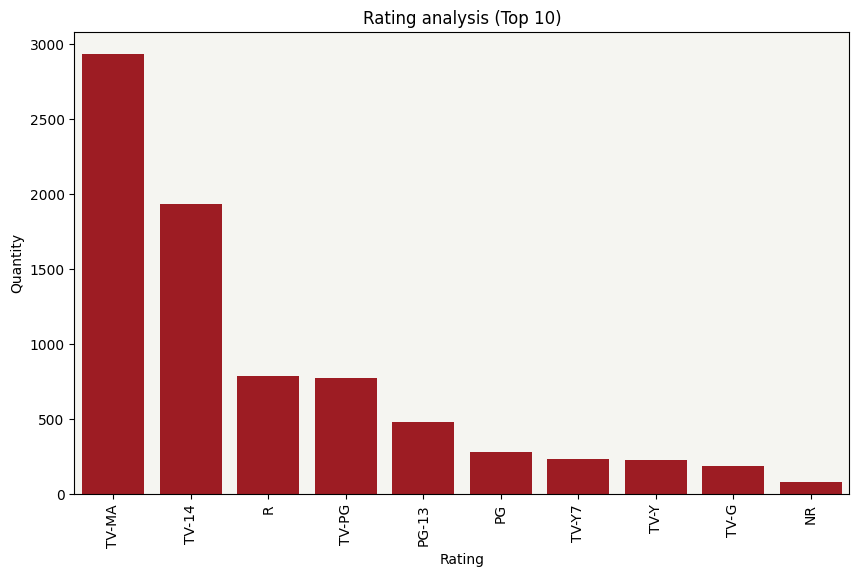

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_ratings = df['rating'].value_counts().nlargest(10).index

filtered_df = df[df['rating'].isin(top_ratings)]

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f1')
sns.countplot(data=filtered_df, x='rating', order=top_ratings, color='#b20710')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Quantity')
plt.title('Rating analysis (Top 10)')
plt.show()

In [60]:
rating_counts = filtered_df['rating'].value_counts().sort_index(ascending=False)
for rating in top_ratings:
    print(f"Quantity for rating {rating}: {rating_counts[rating]}")

plt.show()

Quantity for rating TV-MA: 2932
Quantity for rating TV-14: 1930
Quantity for rating R: 788
Quantity for rating TV-PG: 773
Quantity for rating PG-13: 482
Quantity for rating PG: 281
Quantity for rating TV-Y7: 236
Quantity for rating TV-Y: 227
Quantity for rating TV-G: 190
Quantity for rating NR: 80


Producers are required to assess the films and programs they produce. This assessment pertains to the content contained within them. There are specific ratings to indicate whether a particular film or series is suitable for children or not. Currently, we distinguish the following rating categories:

a. TV Ratings:

TV-Y: All Children - suitable for children ages 2 to 6.
TV-Y7: Directed to Older Children - suitable for children ages 7 and up. Best suited for children who can distinguish between real life and fiction.
TV-Y7 FV: Directed to Older Children - fantasy Violence - Suitable for older children. Contains fantasy violence.
TV-G: General Audience - suitable for all ages. Contains little or no violence.
TV-PG: Parental Guidance Suggested - suitable for younger children in the presence of an adult.
TV-14: Parents Strongly Cautioned - suitable for children 14 and older in the presence of an adult.
TV-MA: Mature Audience Only - intended for adults and may be unsuitable for children under 17.

b. Film Ratings:

G: General Audiences - suitable for all ages.
PG: Parental Guidance Suggested.
PG-13: Parents Strongly Cautioned - some material may be inappropriate for children under 13.
R: Restricted - intended for adults; may be unsuitable for children under 17.
NC-17: Clearly Adult - intended for adults; most parents would find it unsuitable for children under 17.


After visualizing the 10 most frequent ratings, it can be observed that the largest group consists of those intended only for adults (TV-MA). In second place are films and series intended for children aged 14 and older in the presence of an adult (TV-14), and in third place are those intended for younger children in the presence of an adult (TV-PG).

### 6. Move duration analysis

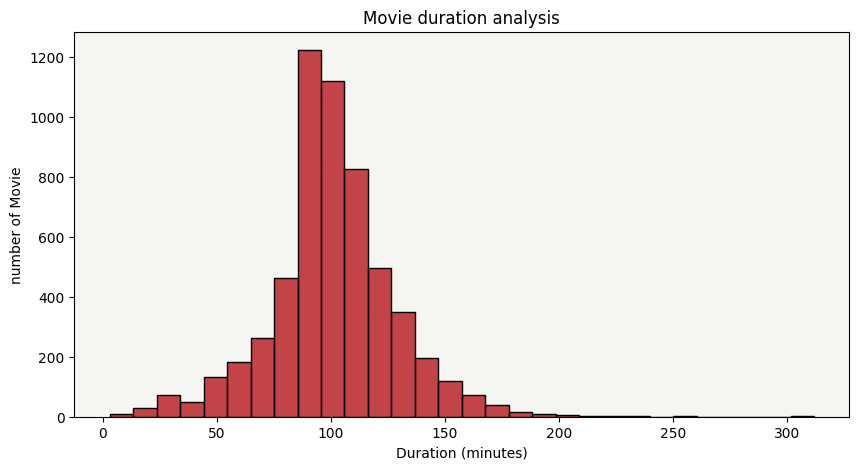

In [61]:
movies_df = df[df['type'] == 'Movie']
movies_df = movies_df[movies_df['duration'] != 'Unknown']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#f5f5f1')
sns.histplot(movies_df['duration'], bins=30, color='#b20710')
plt.title('Movie duration analysis')
plt.xlabel('Duration (minutes)')
plt.ylabel('number of Movie')
plt.show()

The uploaded image shows a histogram titled "Movie duration analysis." This chart depicts the distribution of movie durations in minutes.

The most common movie duration is around 90 minutes, with the peak frequency slightly above 1200 movies. This suggests that a significant number of movies have a duration close to 90 minutes.

The distribution is approximately normal but slightly skewed to the right, indicating that while most movies are around 90 minutes, there are some with significantly longer durations. The majority of movies fall within the 75 to 125-minute range.

There are a few movies with durations extending up to 300 minutes, but these are very rare. Very few movies have durations less than 50 minutes or more than 200 minutes.

### 7. Distribution of the number of seasons of series on Netflix

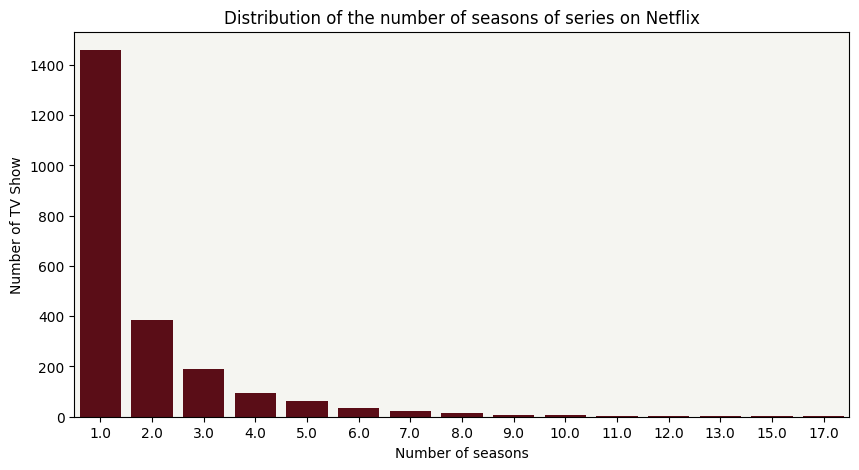

In [62]:
shows_df = df[df['type'] == 'TV Show'].copy()

shows_df.loc[:, 'duration'] = shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(float)

plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#f5f5f1')
sns.countplot(x=shows_df['duration'], color='#67000D')
plt.title('Distribution of the number of seasons of series on Netflix')
plt.xlabel('Number of seasons')
plt.ylabel('Number of TV Show')
plt.show()

Most series on Netflix have only one season, suggesting that the platform offers many mini-series or series that were not extended for additional seasons. With each subsequent season, the number of series significantly decreases. There are nearly 400 series with two seasons, which is a substantial reduction compared to one-season series. There are almost 200 series with three seasons, and only about 100 with four seasons. Series with five seasons number fewer than 100, and those with more seasons are even less common. This may result from viewers' preferences for shorter stories or Netflix's production decisions. A successful series is more likely to continue into a second season, but significantly fewer series are extended beyond three seasons.

### 8. Most frequently collaborating directors and actors

#### A. The most prolific directors

In [63]:
most_prolific_actors = df['cast'].str.split(', ', expand=True).stack().value_counts()
print(most_prolific_actors.head(10))

Unknown             671
Anupam Kher          43
Shah Rukh Khan       34
Naseeruddin Shah     31
Akshay Kumar         30
Om Puri              30
Takahiro Sakurai     29
Amitabh Bachchan     28
Paresh Rawal         28
Yuki Kaji            28
Name: count, dtype: int64


The most popular actors are:
- Anupam Kher         43
- Shah Rukh Khan      35
- Julie Tejwani       33
- Takahiro Sakurai    32
- Naseeruddin Shah    32
- Rupa Bhimani        31
- Akshay Kumar        30
- Om Puri             30
- Yuki Kaji           29
- Paresh Rawal        28

#### B. The most frequently appearing actors

In [64]:
most_prolific_directors = df['director'].str.split(', ', expand=True).stack().value_counts()
print(most_prolific_directors.head(10))

Unknown                2225
Jan Suter                21
RaÃºl Campos             19
Jay Karas                15
Marcus Raboy             15
Cathy Garcia-Molina      13
Jay Chapman              12
Martin Scorsese          12
Youssef Chahine          12
Steven Spielberg         11
Name: count, dtype: int64


The director who created the most films is Rajiv Chilaka - 22 films. Next are:
- Jan Suter              21
- RaÃºl Campos           19
- Suhas Kadav            16
- Marcus Raboy           16
- Jay Karas              15
- Cathy Garcia-Molina    13
- Martin Scorsese        12
- Youssef Chahine        12
- Jay Chapman            12

### 9. Seasonality of adding new content

#### A. Number of added productions by month

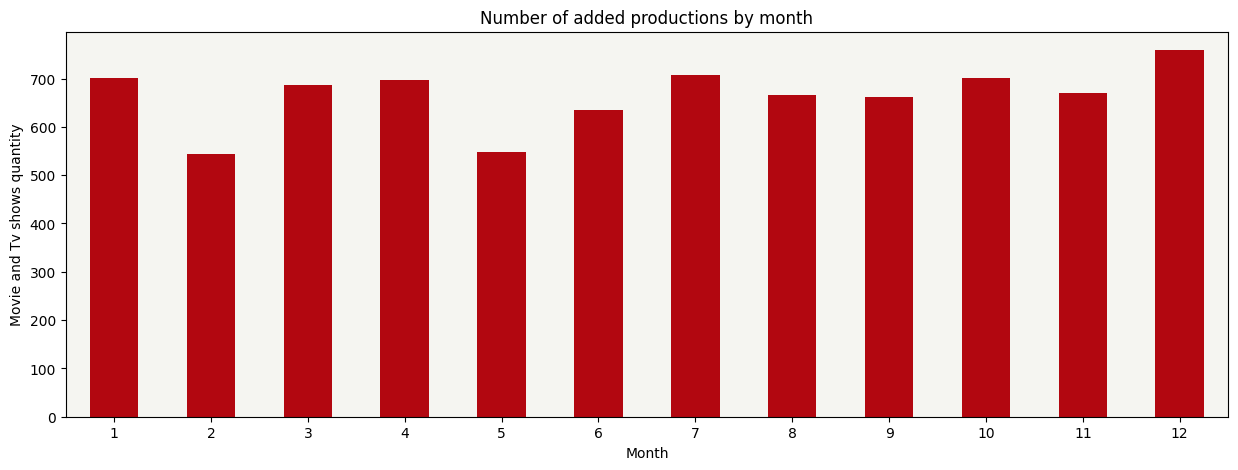

In [65]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df = df.dropna(subset=['date_added'])
df['month_added'] = df['date_added'].dt.month

month_counts = df['month_added'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('#f5f5f1')
df['month_added'].value_counts().sort_index().plot(kind='bar', color='#b20710')
plt.title('Number of added productions by month')
plt.xlabel('Month')
plt.ylabel('Movie and Tv shows quantity')
plt.xticks(rotation=0)
plt.show()

In [66]:
sorted_month_counts = month_counts.sort_values(ascending=False)
print("\nValue data for individual months:")
print(sorted_month_counts)


Value data for individual months:
month_added
12    759
7     708
10    702
1     701
4     697
3     687
11    671
8     667
9     662
6     634
5     547
2     543
Name: count, dtype: int64


The month during which the most films and TV shows were published on the platform is December. December includes many holidays and vacation periods such as Christmas and New Year, which encourage increased activity in watching movies and TV shows by people on holidays or in the comfort of their homes. The months with over 700 publications were July, October, and January. The least number of publications were in February and May. 

#### B. Number of added productions per day of the week

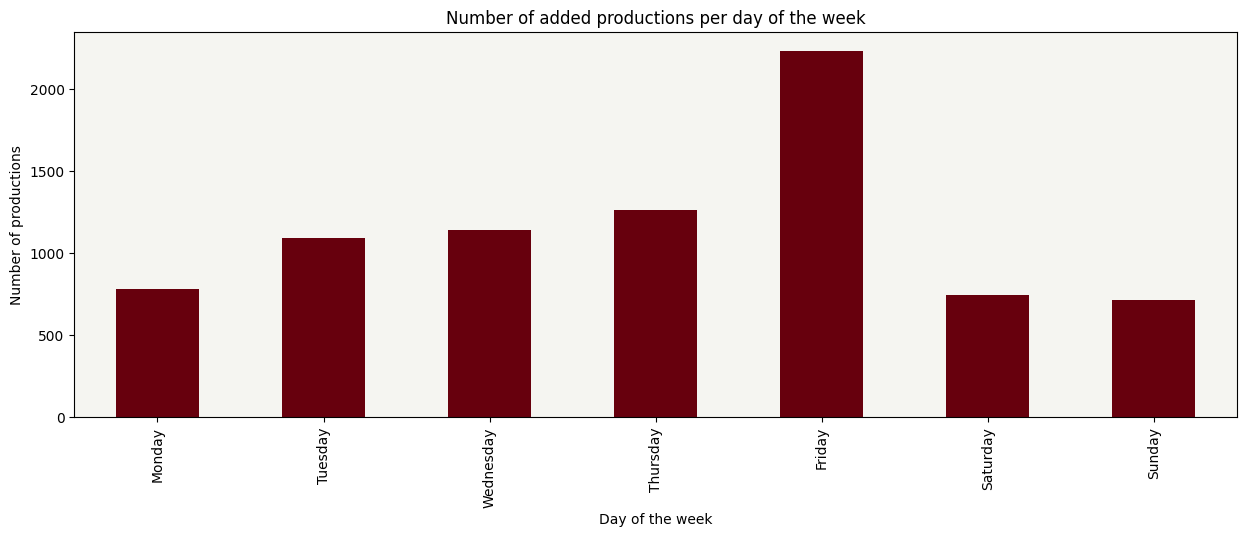

In [78]:
df['weekday_added'] = df['date_added'].dt.dayofweek

plt.figure(figsize=(15, 5))
plt.gca().set_facecolor('#f5f5f1')
df['weekday_added'].value_counts().sort_index().plot(kind='bar', color='#67000D')
plt.title('Number of added productions per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of productions')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

The chart indicates that the highest number of productions are published on Fridays, with over 2000 productions added over the years. This suggests that Netflix prefers to release new content at the end of the workweek, possibly to cater to viewers who are looking forward to weekend binge-watching. 

The second highest number of productions are added on Thursdays, with around 1300 productions. Wednesday is also a notable day for adding new productions, although the number is lower than Thursday and Friday. The fewest number of productions are published on Sundays.
This could indicate that Sunday is considered a less optimal day for releasing new content, possibly due to viewers being occupied with other activities or preparing for the upcoming week.

The high number of releases on Friday and Thursday suggests that Netflix aims to maximize viewership by providing fresh content in time for the weekend. Strategic Mid-Week Releases: By adding new productions on Wednesday, Netflix maintains viewer engagement throughout the week.

### 10. The most popular genres of movies and programs

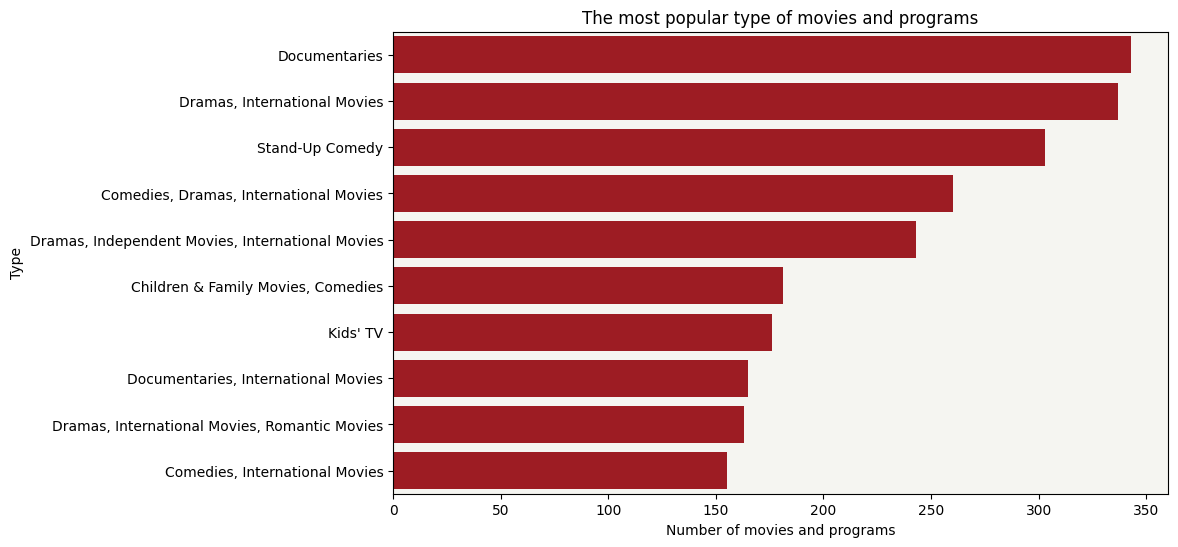

In [79]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f5f5f1')
sns.countplot(data=df, y='listed_in', order=df['listed_in'].value_counts().index[:10], color='#b20710')
plt.xlabel('Number of movies and programs')
plt.ylabel('Type')
plt.title('The most popular type of movies and programs')
plt.show()

The most popular type of movies and programs on the chart is documentaries, with nearly 350 entries.
This indicates a strong viewer interest in factual and informative content. Documentaries appeal to audiences seeking to learn about real-world events, people, and phenomena.

Dramas and international movies are the second most popular type, with slightly fewer entries than documentaries. This suggests that there is a significant demand for both dramatic narratives and content from diverse cultures and countries. Viewers likely appreciate the depth and emotional engagement of dramas, as well as the cultural variety offered by international movies.

Stand-up and comedy programs are in third place, with over 300 entries. This reflects a high popularity for humor and entertainment that provides relief and enjoyment. Comedy content, including stand-up performances, is likely a go-to choice for viewers looking to relax and have a good laugh.

### 11. Content analysis

#### A. Analyze the most common words in titles.

In [70]:
from collections import Counter
from wordcloud import WordCloud

title_words = [word for word in ' '.join(df['title'].dropna()).lower().split() if len(word) >= 3]
title_word_count = Counter(title_words)

most_common_title_words = title_word_count.most_common(10)
title_df = pd.DataFrame(most_common_title_words, columns=['Word', 'Count'])
print(title_df)

        Word  Count
0        the   2013
1        and    202
2       love    139
3       with     89
4        for     87
5  christmas     75
6        you     72
7        man     70
8      story     68
9       life     63


The most popular words in titles are: the, and, love, with, for, christmas, you, man, story, life.

#### B. Analyze the most common words in the descriptions.

In [71]:
description_words = [word for word in ' '.join(df['description'].dropna()).lower().split() if len(word) >= 3]
description_word_count = Counter(description_words)

most_common_description_words = description_word_count.most_common(10)
title_df2 = pd.DataFrame(most_common_description_words, columns=['Word', 'Count'])
print(title_df2)

    Word  Count
0    the   7271
1    and   5600
2    his   3110
3   with   2033
4    her   1907
5    for   1582
6  their   1519
7   when   1402
8   this   1254
9   from   1137


The most popular words in descriptions are: the, and, his, with, her, for, their, when, this, from.

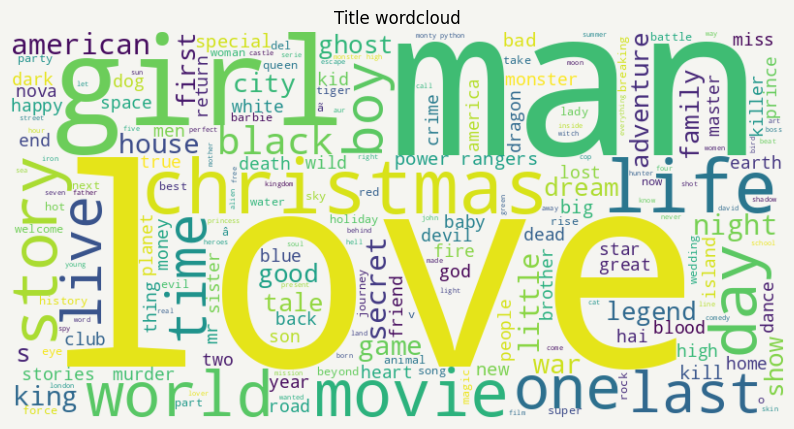

In [72]:
# Title wordcloud
title_wordcloud = WordCloud(width=800, height=400, background_color='#f5f5f1').generate(' '.join(title_words))
plt.figure(figsize=(10, 6), facecolor='#f5f5f1')
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Title wordcloud')
plt.show()

### 12. Display correlation between release year and move duration.

In [74]:
movies_df = df[df['type'] == 'Movie']

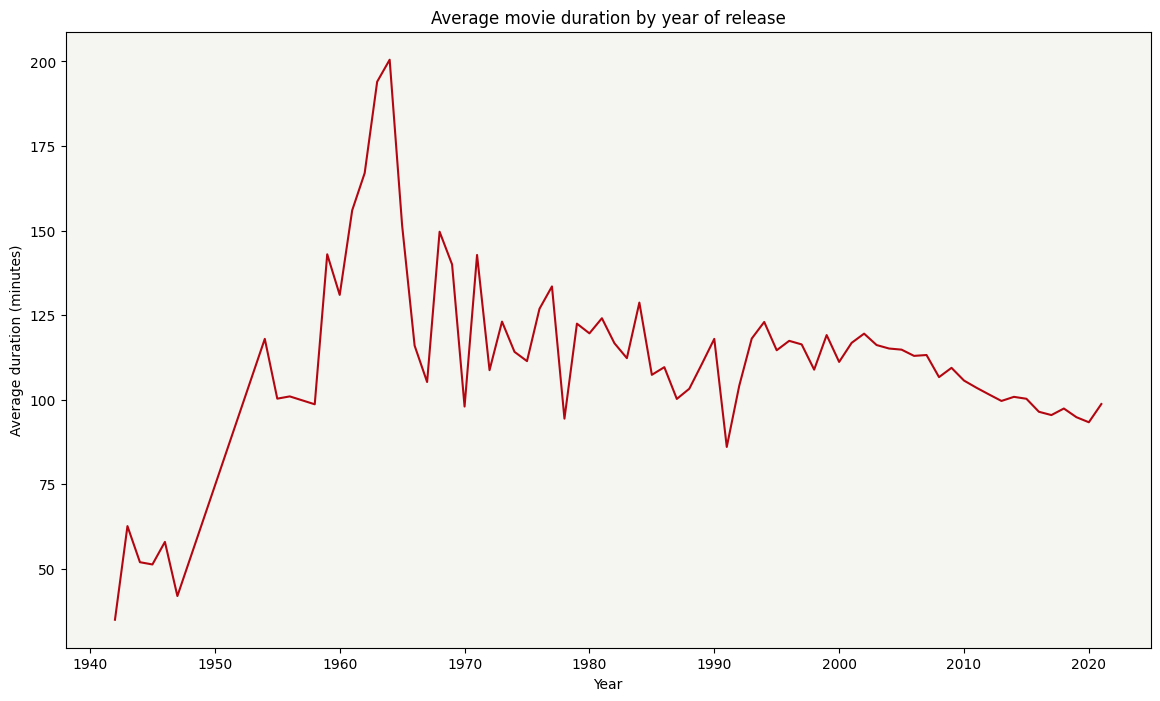

Correlation between year of release and duration: -0.19634238656041705


In [80]:
average_duration_per_year = movies_df.groupby('release_year')['duration'].mean()

plt.figure(figsize=(14, 8))
plt.gca().set_facecolor('#f5f5f1')
average_duration_per_year.plot(kind='line', color='#b20710')
plt.title('Average movie duration by year of release')
plt.xlabel('Year')
plt.ylabel('Average duration (minutes)')
plt.show()

correlation = movies_df['release_year'].corr(movies_df['duration'])
print(f'Correlation between year of release and duration: {correlation}')

The correlation between the release year of a movie and its duration is -0.2062, indicating a weak, negative correlation between these two variables.

A negative correlation suggests that as the release year of the movie gets later, the average duration of the movie decreases. In the case of this specific correlation, we can infer that movies released in later years may tend to have shorter durations compared to those released in earlier years. However, the correlation value of -0.2062 is relatively close to zero, suggesting that the relationship between the release year and the duration is not very strong.

## Step 4: Recommendation system based on genre

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'].fillna(''))

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

print(get_recommendations('Breaking Bad'))

6026          9 Months That Made You
6341                  Blue Planet II
6487                 City in the Sky
6659         Earth's Natural Wonders
6785                Forces of Nature
7069      India: Nature's Wonderland
7300                Life on Location
7301                      Life Story
7485                   Monkey Planet
7571    Nature's Great Events (2009)
Name: title, dtype: object


In [77]:
print(get_recommendations('Peaky Blinders'))

206    LSD: Love, Sex Aur Dhokha
282         La diosa del asfalto
365              Eyes of a Thief
698                     Fan Girl
750                Tragic Jungle
839     The Day I lost My Shadow
873                        Ahaan
892     Tottaa Pataaka Item Maal
894       Dance of the Forty One
909                    Milestone
Name: title, dtype: object
